**<span style="color:crimson;">Business Problem**
    
In this notebook, we develop a model for predicting the final price of each home with 79 explanatory variables describing the characteristics of homes in Ames, Iowa.

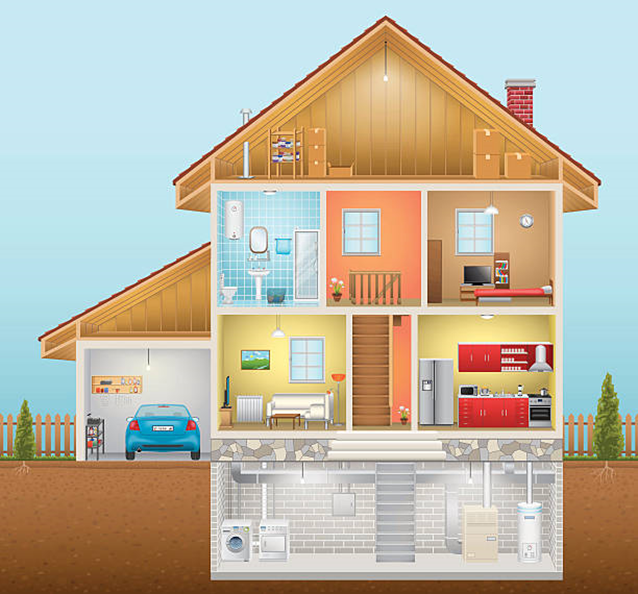

**<span style="color:crimson;">Task Details**
    
* [1. IMPORTING LIBRARIES AND DATA](#section-one)
* [2. EXPLORATORY DATA ANALYSIS](#section-two)
    * [2.1 General Picture](#sub_section-2.1)
    * [2.2 Categorical and Numerical Variable Analysis](#sub_section-2.2)
    
 
* [3. FEATURE ENGINEERING & DATA PRE-PROCESSING](#section-three)
    * [3.1 Outliers](#sub_section-3.1)
    * [3.2 Missing Values](#sub_section-3.2)
    * [3.3 Encoding (Label Encoding, One-Hot Encoding)](#sub_section-3.3)
    * [3.4 Feature Extraction & Interactions](#sub_section-3.4)
    * [3.5 Feature Scaling](#sub_section-3.5)

    
    
* [4. MODEL & PREDICTION](#section-four)
 
* [5. MODEL EVALUATION](#section-five)
    * [5.1 Automated Hyperparameter Optimization](#sub_section-5.1)
    * [5.2 Stacking & Ensemble Learning](#sub_section-5.2)
    

<a id="section-one"></a>
# <span style="color:crimson;">1. IMPORTING LIBRARIES AND DATA

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# !pip install lightgbm
# !pip install xgboost
# !pip install missingno
import missingno as msno
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score,cross_validate,GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error


warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter('ignore', category=ConvergenceWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
df = pd.read_csv(r'C:\Users\Workstation\PycharmProjects\VBO1\Final_Project/train.csv') 
df_test = pd.read_csv(r'C:\Users\Workstation\PycharmProjects\VBO1\Final_Project/test.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<a id="section-two"></a>
# <span style="color:crimson;"> 2. EXPLORATORY DATA ANALYSIS    

 <a id="sub_section-2.1"></a>
 ## <span style="color:crimson;"> 2.1 General Picture

In [5]:
df.shape

(1460, 81)

In [6]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col,':',df[col].isnull().sum()) 

LotFrontage : 259
Alley : 1369
MasVnrType : 8
MasVnrArea : 8
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
Electrical : 1
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81
PoolQC : 1453
Fence : 1179
MiscFeature : 1406


<a id="sub_section-2.2"></a>
## <span style="color:crimson;"> 2.2 Categorical and Numerical Variable analysis

In [7]:
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
num_but_cat = [col for col in df.columns if df[col].nunique() < 20 and
                   df[col].dtypes != "O"]
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and
                   df[col].dtypes == "O"]
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]

num_cols = [col for col in df.columns if df[col].dtypes != "O"]
num_cols = [col for col in num_cols if col not in num_but_cat]

print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f'cat_cols: {len(cat_cols)}')
print(f'num_cols: {len(num_cols)}')
print(f'cat_but_car: {len(cat_but_car)}')
print(f'num_but_cat: {len(num_but_cat)}')

Observations: 1460
Variables: 81
cat_cols: 57
num_cols: 23
cat_but_car: 1
num_but_cat: 15


<a id="section-three"></a>
# <span style="color:crimson;"> 3. FEATURE ENGINEERING & DATA PRE-PROCESSING

In [8]:
full = pd.concat([df,df_test],axis=0).reset_index(drop=True)

 <a id="sub_section-3.1"></a>
 ## <span style="color:crimson;"> 3.1 Outliers

In [9]:
for col in num_cols:
    if col != "SalePrice":
        quartile1 = df[col].quantile(0.05)
        quartile3 = df[col].quantile(0.95)
        interquantile_range = quartile3 - quartile1
        up_limit = quartile3 + 1.5 * interquantile_range
        low_limit = quartile1 - 1.5 * interquantile_range
        if df[(df[col] > up_limit) | (df[col] < low_limit)].any(axis=None):
            print(col)


LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
TotalBsmtSF
1stFlrSF
LowQualFinSF
GrLivArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
MiscVal


In [10]:
for col in num_cols:
    if col != "SalePrice":
        df.loc[(df[col] < low_limit), col] = low_limit
        df.loc[(df[col] > up_limit), col] = up_limit

<a id="sub_section-3.2"></a>
## <span style="color:crimson;"> 3.2 Missing Values

Empty values in some variables indicate that the house does not have that feature.

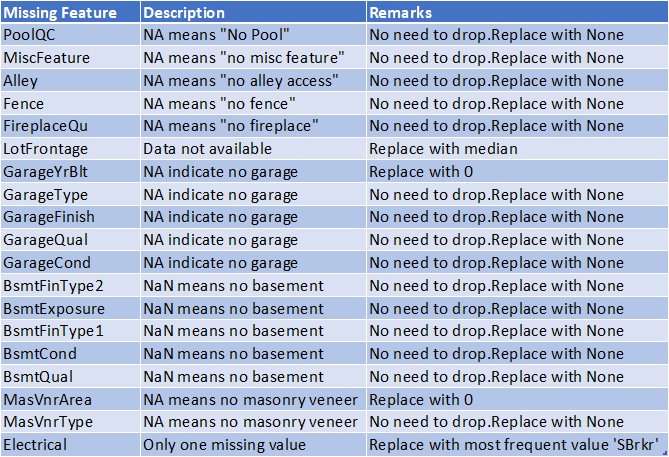

In [11]:
no_cols = ["Alley", "BsmtQual", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType",
           "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature", "MasVnrType", "BsmtCond"]

for col in no_cols:
    df[col].fillna("No", inplace=True)

In [12]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col,':',df[col].isnull().sum()) 

LotFrontage : 259
MasVnrArea : 8
Electrical : 1
GarageYrBlt : 81


In [13]:
df["LotFrontage"]=df["LotFrontage"].fillna(df["LotFrontage"].median())
df["MasVnrArea"]=df["MasVnrArea"].fillna(0)
df["GarageYrBlt"]=df["GarageYrBlt"].fillna(0)
df["Electrical"]=df["Electrical"].fillna(df["Electrical"].mode()[0])

 <a id="sub_section-3.3"></a>
 ## <span style="color:crimson;"> 3.3 Encoding (Label Encoding, One-Hot Encoding)

<span style="color:crimson;">**Label Encoding**

In [14]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O"
               and len(df[col].unique()) == 2]

binary_cols

for col in label_cols:
    labelencoder = LabelEncoder()
    df[col] = labelencoder.fit_transform(df[col])

In [ ]:
label_cols = ['LotShape', 'CentralAir', 'OverallQual', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
              'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
              'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'OverallCond',"MoSold"]


for col in label_cols:
    labelencoder = LabelEncoder()
    df[col] = labelencoder.fit_transform(df[col])

In [15]:
df.shape

(1460, 81)

<span style="color:crimson;">**One-Hot Encoding**

In [16]:
c=['MSZoning', 'LotShape', 'LotConfig',  'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofMatl',
 'RoofStyle', 'MasVnrType', 'Foundation', 'Electrical', 'Functional', 'GarageType',
  'SaleType', 'SaleCondition', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
  'Fireplaces', 'GarageCars',"Exterior1st","Exterior2nd"]

df = pd.get_dummies(df, columns=c, drop_first=True)

In [17]:
df.shape

(1460, 198)

<a id="sub_section-3.4"></a>
## <span style="color:crimson;"> 3.4 Feature Extraction & Interactions

In [18]:
df["New_HouseAge"] = df.YrSold - df.YearBuilt

df["New_TotalFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"]


df["New_TotalBsmtFin"] = df.BsmtFinSF1 + df.BsmtFinSF2
df["New_TotalBsmtFinType1"] = df.BsmtFinSF1 * df.BsmtFinType1
df["New_TotalBsmtFinType2"] = df.BsmtFinSF2 * df.BsmtFinType2


df["New_PorchArea"] = df.OpenPorchSF + df.EnclosedPorch + df.ScreenPorch + df["3SsnPorch"] + df.WoodDeckSF

df["New_TotalHouseArea"] = df.New_TotalFlrSF + df.TotalBsmtSF

df["New_TotalSqFeet"] = df.GrLivArea + df.TotalBsmtSF  # Above grade (ground) living area square feet  +  Total square feet of basement area

df["New_TotalFullBath"] = df.BsmtFullBath_1 +df.BsmtFullBath_2+df.BsmtFullBath_3+ df.FullBath_1+df.FullBath_2+df.FullBath_3
df["New_TotalHalfBath"] = df.BsmtHalfBath_1 + df.BsmtHalfBath_2+df.HalfBath_1+df.HalfBath_2

df["New_TotalBath"] = df["New_TotalFullBath"] + (df["New_TotalHalfBath"] * 0.5)
df.columns
df["New_OverallGrade"] = df["OverallQual"] * df["OverallCond"]
df["New_BsmtGrade"] = df["BsmtQual"] * df["BsmtCond"]
df["New_ExterGrade"] = df["ExterQual"] * df["ExterCond"]

In [19]:
df.shape

(1460, 212)

In [20]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LandContour,Utilities,LandSlope,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_1,LotShape_2,LotShape_3,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,MasVnrType_BrkFace,MasVnrType_No,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,New_HouseAge,New_TotalFlrSF,New_TotalBsmtFin,New_TotalBsmtFinType1,New_TotalBsmtFinType2,New_PorchArea,New_TotalHouseArea,New_TotalSqFeet,New_TotalFullBath,New_TotalHalfBath,New_TotalBath,New_OverallGrade,New_BsmtGrade,New_ExterGrade
0,0,60,0.000,0,Pave,No,Lvl,AllPub,Gtl,CollgCr,6,4,0,0,0.000,2,4,2,4,3,2,0,6,0,0,0,GasA,0,1,0,0,0,0,2,8,3,0.000,2,0,5,5,2,0,0,0,0,0,0,3,4,No,0,1,2008,208500,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2008,0,0,0,0,0,0,0,2,1,2.500,24,8,8
1,0,20,0.000,0,Pave,No,Lvl,AllPub,Gtl,Veenker,5,7,0,0,0.000,3,4,2,4,1,0,0,6,0,0,0,GasA,0,1,0,0,0,0,3,6,5,0.000,2,0,5,5,2,0,0,0,0,0,0,3,4,No,0,4,2007,181500,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,

In [21]:
drop_list = ["Street","Alley","LandContour","Utilities","LandSlope","Heating","PoolQC","MiscFeature","Neighborhood"]

df.drop(drop_list, axis=1, inplace=True)
df.shape

(1460, 203)

<a id="sub_section-3.5"></a>
## <span style="color:crimson;"> 3.5 Feature Scaling

In [22]:
y = np.log1p(df['SalePrice'])
X = df.drop(["Id", "SalePrice"], axis=1)
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

<a id="section-four"></a>
# <span style="color:crimson;"> 4. MODEL & PREDICTION

In [23]:
models = [("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor())]


for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 0.1546 (Ridge) 
RMSE: 0.3992 (Lasso) 
RMSE: 0.3992 (ElasticNet) 
RMSE: 0.1999 (KNN) 
RMSE: 0.2313 (CART) 
RMSE: 0.164 (RF) 
RMSE: 0.1549 (GBM) 
RMSE: 0.1638 (XGBoost) 
RMSE: 0.1566 (LightGBM) 


<a id="section-five"></a>
# <span style="color:crimson;"> 5. MODEL EVALUATION

<a id="sub_section-5.1"></a>
## <span style="color:crimson;"> 5.1 Automated Hyperparameter Optimization


In [24]:

gbm_params = {"learning_rate": [0.03,0.07,0.9],#[],  [0.025,0.03,0.05]0.06,,0.0750.06,
              "max_depth": [2,3,5],#[2,3,4,5,6,8],  
              "n_estimators": [100,200,250],#100,150,175,180,190,,205,210,220,225,230,240,250
              "subsample": [0,75,0.85,0.95]}  # 0.98,0.99,1]0.1,0.25,0.65,0.75,0.9,0.95,0.96,0.97,,0.95
#{'learning_rate': 0.025, 'max_depth': 8, 'n_estimators': 180, 'subsample': 0.1}
#GBM best params: {'learning_rate': 0.07, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.85} RMSE (After): 0.1501 (GBM) 
#GBM best params: {'learning_rate': 0.025, 'max_depth': 5, 'n_estimators': 180, 'subsample': 0.1} RMSE (After): 0.1531

rf_params = {"max_depth": [5,10,20],# 5,10,11,12,13,14,15,17,
             "max_features":  [25,50,75],# 15,20,30,40,45,60,70,75,100
             "min_samples_split": [2,4], # 3,4,5,6,8 
             "n_estimators":[100,300,500] }  # 50,150,200,300,350,400,
#RF best params: {'max_depth': 11, 'max_features': 40, 'min_samples_split': 4, 'n_estimators': 150}
#RF best params: {'max_depth': 20, 'max_features': 50, 'min_samples_split': 2, 'n_estimators': 500}RMSE (After): 0.1565 (RF) 


xgboost_params = {"learning_rate": [0.07],# 0.01,0.025,0.05,0.08,0.09,0.1,0.25,1
                  "max_depth": [4,6,8],# [3],2,3,4,5,8
                  "n_estimators":[100,270,350],# 100,125,150,175,200,225,250,300,350,500
                  "colsample_bytree": [0,2,0.4,0.75]}  # 0.05,0.15,0.2,0.25,0.3,0.5,0.75,1
#GBoost best params: {'colsample_bytree': 0.15, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
#XGBoost best params: {'colsample_bytree': 0.4, 'learning_rate': 0.07, 'max_depth': 6, 'n_estimators': 270} RMSE (After): 0.1436
#XGBoost best params: {'colsample_bytree': 0.75, 'learning_rate': 0.09, 'max_depth': 3, 'n_estimators': 300} RMSE (After): 0.1471

lightgbm_params = {"learning_rate":[0.009,0.05,0.25],# 0.01,0.02, 0.008,,0.01,0.015,0.05, 0.1,0.25
                   "max_depth": [2,3,5],#2,4,5,6,7,10
                   "n_estimators": [2500],#500,1800,2000,,3000,3500,3750,4000,4500,4750
                   "colsample_bytree": [0.15,0.5,0.9]}  # 0.1,0.16,0.175,0.2,0.25,0.5,0.75,0.9
#LightGBM best params: {'colsample_bytree': 0.15, 'learning_rate': 0.009, 'max_depth': 3, 'n_estimators': 2500}
#LightGBM best params: {'colsample_bytree': 0.25, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 500} RMSE (After): 0.1439
#LightGBM best params: {'colsample_bytree': 0.15, 'learning_rate': 0.009, 'max_depth': 3, 'n_estimators': 2500} RMSE (After): 0.1421 (LightGBM)


regressors = [
    ("GBM", GradientBoostingRegressor(), gbm_params),
("RF", RandomForestRegressor(), rf_params),
('XGBoost', XGBRegressor(objective='reg:squarederror'), xgboost_params),
('LightGBM', LGBMRegressor(), lightgbm_params) ]



In [25]:
best_models = {}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

for name, regressor, params in regressors:
    print(f"########## {name} ##########")

    reg_model = regressor.fit(X_train, y_train)
    y_pred = reg_model.predict(X_test)
    test_r2 = reg_model.score(X_test, y_test)
    print(f"Test R2: {round(test_r2, 4)} ({name}) ")
    cv_rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE (Before): {round(cv_rmse, 4)} ({name}) ")
    
    gs_best = GridSearchCV(regressor, params, cv=3, n_jobs=-1, verbose=False).fit(X, y)

    final_model = regressor.set_params(**gs_best.best_params_)
    rmse = np.mean(np.sqrt(-cross_val_score(final_model, X, y, cv=10, scoring="neg_mean_squared_error")))
    print(f"RMSE (After): {round(rmse, 4)} ({name}) ")

    print(f"{name} best params: {gs_best.best_params_}", end="\n\n")

    best_models[name] = final_model

########## GBM ##########
Test R2: 0.8711 (GBM) 
RMSE (Before): 0.1534 (GBM) 


C:\Users\Workstation\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.78622118 0.78354063        nan        nan
 0.83246787 0.83097738        nan        nan 0.83798599 0.83699409
        nan        nan 0.81627448 0.81317554        nan        nan
 0.83974331 0.83914575        nan        nan 0.84545737 0.84332551
        nan        nan 0.82658033 0.8240783         nan        nan
 0.84214019 0.83769871        nan        nan 0.84272217 0.83851501
        nan        nan 0.8368082  0.83540992        nan        nan
 0.84752205 0.84722391        nan        nan 0.84623321 0.84660808
        nan        nan 0.84335548 0.84261631        nan        nan
 0.84824458 0.84662425        nan        nan 0.85120384 0.84885028
        nan        nan 0.84267404 0.8352994         nan        nan
 0.8441025  0.84105518        nan        nan 0.84374905 0.83718667
        nan        nan 0.75374141 0.76576481   

RMSE (After): 0.1486 (GBM) 
GBM best params: {'learning_rate': 0.07, 'max_depth': 3, 'n_estimators': 250, 'subsample': 0.85}

########## RF ##########
Test R2: 0.8398 (RF) 
RMSE (Before): 0.1614 (RF) 
RMSE (After): 0.1565 (RF) 
RF best params: {'max_depth': 20, 'max_features': 50, 'min_samples_split': 2, 'n_estimators': 500}

########## XGBoost ##########
Test R2: 0.8556 (XGBoost) 
RMSE (Before): 0.1591 (XGBoost) 


C:\Users\Workstation\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.40326931 0.68007036 0.7205662  0.40300545 0.68013969 0.72059484
 0.40310886 0.68022932 0.72065813        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.84246831 0.85390628 0.85303451 0.84620852 0.85403882 0.85343242
 0.84473128 0.84876769 0.84851231 0.83772205 0.84778943 0.84715535
 0.83555952 0.84103442 0.84065939 0.83778981 0.84119978 0.84097056]
  warnings.warn(


RMSE (After): 0.1458 (XGBoost) 
XGBoost best params: {'colsample_bytree': 0.4, 'learning_rate': 0.07, 'max_depth': 6, 'n_estimators': 270}

########## LightGBM ##########
Test R2: 0.8679 (LightGBM) 
RMSE (Before): 0.152 (LightGBM) 
RMSE (After): 0.1427 (LightGBM) 
LightGBM best params: {'colsample_bytree': 0.15, 'learning_rate': 0.009, 'max_depth': 3, 'n_estimators': 2500}



<a id="sub_section-5.2"></a>
## <span style="color:crimson;"> 5.2 Stacking & Ensemble Learning

In [26]:
voting_reg = VotingRegressor(estimators=[('XGBoost', best_models["XGBoost"]),
                                         ('LightGBM', best_models["LightGBM"])])

voting_reg.fit(X, y)

np.mean(np.sqrt(-cross_val_score(voting_reg, X, y, cv=10, scoring="neg_mean_squared_error")))

0.1417531479569426